In [858]:
import pandas as pd
import numpy as np
#Load File
df = pd.read_excel('laei-2019-major-roads-vkm-flows-speeds.xlsx')

In [859]:
print(df.shape)

#Remove hyphen
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.replace('-', np.nan, inplace=True)

#Missing value Handling
df = df.dropna()

#Rename columns
df.columns = [x.strip() for x in df.columns]
df = df.rename(columns ={'Speed (km/hr) - Except Buses':'Speed'})

#Drop total columns
df = df.drop(['AADT 2019 - Total','VKM 2019 - Total'],axis=1)

print(df.shape)

(79437, 48)


C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\4164640783.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\4164640783.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


(44826, 46)


In [860]:
#Handling AADT and VKM data
id_col = ['TOID','LAEI Zone', 'Borough', 'Road Classification','Speed','Link Length (m)']
aadt_col = [col for col in df.columns if col.startswith('AADT')]
vkm_col = [col for col in df.columns if col.startswith('VKM')]

In [861]:
#For AADT data
df_aadt = df[id_col + aadt_col]
df_aadt['Car'] = df_aadt['AADT Petrol Car'] + df_aadt['AADT Diesel Car'] + df_aadt['AADT Taxi']
df_aadt['Public Transport'] = df_aadt['AADT 2019 - Buses'] + df_aadt['AADT 2019 - Coaches']
df_aadt['PHV'] = df_aadt['AADT Petrol PHV'] + df_aadt['AADT Diesel PHV']
df_aadt['LGV'] = df_aadt['AADT Petrol LGV'] + df_aadt['AADT Diesel LGV']
df_aadt['Rigid'] = df_aadt['AADT 2019 - HGVs - Rigid - 2 Axles'] + df_aadt['AADT 2019 - HGVs - Rigid - 3 Axles'] + df_aadt['AADT 2019 - HGVs - Rigid - 4 or more Axles']
df_aadt['Artic'] = df_aadt['AADT 2019 - HGVs - Articulated - 3 to 4 Axles'] + df_aadt['AADT 2019 - HGVs - Articulated - 5 Axles'] + df_aadt['AADT 2019 - HGVs - Articulated - 6 Axles']
aadt_col = ['Car','Public Transport','PHV','LGV','Rigid','Artic']
df_aadt = df_aadt.melt(id_vars=id_col,
                  value_vars=aadt_col, var_name='VehicleType', value_name='AADT')

df_aadt['VehicleType'] = df_aadt['VehicleType'].str.replace('AADT 2019 - ','')
df_aadt['VehicleType'] = df_aadt['VehicleType'].str.replace('AADT ','')
df_aadt

C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\2768449500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aadt['Car'] = df_aadt['AADT Petrol Car'] + df_aadt['AADT Diesel Car'] + df_aadt['AADT Taxi']
C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\2768449500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aadt['Public Transport'] = df_aadt['AADT 2019 - Buses'] + df_aadt['AADT 2019 - Coaches']
C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\2768449500.py:5: SettingWithCopyWarning: 


,TOID,LAEI Zone,Borough,Road Classification,Speed,Link Length (m),VehicleType,AADT
0,osgb4000000030400377,Non-GLA,Non-GLA,A Road,44.0,22,Car,5898.0
1,osgb4000000030151183,Non-GLA,Non-GLA,A Road,37.0,105,Car,6228.0
2,osgb4000000030090345,Non-GLA,Non-GLA,A Road,46.0,187,Car,3828.0
3,osgb4000000027948232,Non-GLA,Non-GLA,A Road,34.0,51,Car,7465.0
4,osgb4000000030078494,Non-GLA,Non-GLA,A Road,42.0,511,Car,13680.0
...,...,...,...,...,...,...,...,...
268951,osgb4000000031088429,Central London,Westminster,B Road,20.0,21,Artic,9.0
268952,osgb4000000031088430,Central London,Westminster,B Road,20.0,21,Artic,6.0
268953,osgb4000000030419424,Central London,Islington,B Road,25.0,16,Artic,3.0
268954,osgb4000000030419425,Central London,Islington,B Road,26.0,25,Artic,3.0


In [862]:
#For VKM data
df_vkm = df[id_col + vkm_col]
df_vkm['Car'] = df_vkm['VKM Petrol Car'] + df_vkm['VKM Diesel Car'] + df_vkm['VKM Taxi']
df_vkm['Public Transport'] = df_vkm['VKM 2019 - Buses'] + df_vkm['VKM 2019 - Coaches']
df_vkm['PHV'] = df_vkm['VKM Petrol PHV'] + df_vkm['VKM Diesel PHV']
df_vkm['LGV'] = df_vkm['VKM Petrol LGV'] + df_vkm['VKM Diesel LGV']
df_vkm['Rigid'] = df_vkm['VKM 2019 - HGVs - Rigid - 2 Axles'] + df_vkm['VKM 2019 - HGVs - Rigid - 3 Axles'] + df_vkm['VKM 2019 - HGVs - Rigid - 4 or more Axles']
df_vkm['Artic'] = df_vkm['VKM 2019 - HGVs - Articulated - 3 to 4 Axles'] + df_vkm['VKM 2019 - HGVs - Articulated - 5 Axles'] + df_vkm['VKM 2019 - HGVs - Articulated - 6 Axles']
vkm_col = ['Car','Public Transport','PHV','LGV','Rigid','Artic']
df_vkm = df_vkm.melt(id_vars=id_col,
                  value_vars=vkm_col, var_name='VehicleType', value_name='VKM')


C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\374338955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vkm['Car'] = df_vkm['VKM Petrol Car'] + df_vkm['VKM Diesel Car'] + df_vkm['VKM Taxi']
C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\374338955.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vkm['Public Transport'] = df_vkm['VKM 2019 - Buses'] + df_vkm['VKM 2019 - Coaches']
C:\Users\achahal\AppData\Local\Temp\ipykernel_31128\374338955.py:5: SettingWithCopyWarning: 
A value is tryi

In [863]:
#Merge AADT and VKM data
df_clean = pd.merge(df_aadt, df_vkm, on=id_col + ['VehicleType'], how='inner')

In [864]:
#Check VehicleType
df_clean.VehicleType.unique()

array(['Car', 'Public Transport', 'PHV', 'LGV', 'Rigid', 'Artic'],
      dtype=object)

### 2.2 Emission Data

In [866]:
pip install pyxlsb

Note: you may need to restart the kernel to use updated packages.


In [867]:
emission = pd.read_csv('Copy of LAEI2019-nox-pm-co2-major-roads-link-emissions.csv')

In [868]:
#Missing value Handling
print(emission.shape)
emission = emission.dropna()
print(emission.shape)

(79439, 51)
(79372, 51)


In [869]:
#Handling emission data
TargetYear_col = [col for col in emission.columns if col.endswith('2019') or col in ['TOID', 'pollutant', 'emissions-units']]
emission = emission[TargetYear_col]
emission['Car'] = emission['Road-Car-Petrol-2019'] + emission['Road-Car-Diesel-2019'] + emission['Road-Taxi-2019']
emission['Public Transport'] = emission['Road-TfL-Bus-2019'] + emission['Road-Non-TfL-Bus-or-Coach-2019']
emission['PHV'] = emission['Road-PHV-Petrol-2019'] + emission['Road-PHV-Diesel-2019']
emission['LGV'] = emission['Road-LGV-Petrol-2019'] + emission['Road-LGV-Diesel-2019']
emission['Rigid'] = emission['Road-HGV-Rigid-2019']
emission['Artic'] = emission['Road-HGV-Articulated-2019']
emission_col = ['Car','Public Transport','PHV','LGV','Rigid','Artic']
emission = emission[['TOID']+emission_col]


In [870]:
#Melt table for VehicleType
emission_clean = emission.melt(id_vars=['TOID'],
                       value_vars=emission_col, var_name='VehicleType', value_name='Emission Value')

In [871]:
emission_clean.head()

,TOID,VehicleType,Emission Value
0,osgb4000000027865913,Car,8.613800
1,osgb4000000027865914,Car,8.723383
2,osgb4000000027865915,Car,11.095587
3,osgb4000000027865916,Car,12.974041
4,osgb4000000027865917,Car,7.712597


### 2.3 Main DataFrame

In [873]:
#Merge table for main dataframe
main_df = pd.merge(df_clean,emission_clean,on=['TOID','VehicleType'],how='inner')
main_df.shape

(268818, 10)

the performance of all three models is very similar. Lasso shows a slight improvement in terms of absolute error (MAE), but the differences are minimal, and any of these models could be a reasonable choice depending on the specific use case.

### 2.4 KNN Model

In [876]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [877]:
main_df.columns

Index(['TOID', 'LAEI Zone', 'Borough', 'Road Classification', 'Speed',
       'Link Length (m)', 'VehicleType', 'AADT', 'VKM', 'Emission Value'],
      dtype='object')

In [878]:
main_df.head()

,TOID,LAEI Zone,Borough,Road Classification,Speed,Link Length (m),VehicleType,AADT,VKM,Emission Value
0,osgb4000000030400377,Non-GLA,Non-GLA,A Road,44.0,22,Car,5898.0,47357.0,0.012420
1,osgb4000000030151183,Non-GLA,Non-GLA,A Road,37.0,105,Car,6228.0,238209.0,0.068202
2,osgb4000000030090345,Non-GLA,Non-GLA,A Road,46.0,187,Car,3828.0,261606.0,0.068256
3,osgb4000000027948232,Non-GLA,Non-GLA,A Road,34.0,51,Car,7465.0,138959.0,0.041023
4,osgb4000000030078494,Non-GLA,Non-GLA,A Road,42.0,511,Car,13680.0,2551410.0,0.687042


In [879]:
X = main_df[['Speed', 'Link Length (m)', 'AADT', 'VKM']]
y = main_df['Emission Value']

In [880]:
print(main_df.dtypes)


TOID                    object
LAEI Zone               object
Borough                 object
Road Classification     object
Speed                  float64
Link Length (m)          int64
VehicleType             object
AADT                   float64
VKM                    float64
Emission Value         float64
dtype: object


In [881]:
print(main_df['VehicleType'].unique())


['Car' 'Public Transport' 'PHV' 'LGV' 'Rigid' 'Artic']


In [882]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [883]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [884]:
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [885]:
y_pred = knn_model.predict(X_test)

In [886]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [887]:
y_test = y_test.astype(float)
y_pred = y_pred.astype(float)


In [888]:
# Try different values for n_neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)


for k in range(1, 5):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f'K={k}, MAE={mean_absolute_error(y_test, y_pred)}')


Mean Absolute Error: 0.011692829001783984
Mean Squared Error: 0.0010908861084102926
K=1, MAE=0.014205729828060402
K=2, MAE=0.01284740160248106
K=3, MAE=0.012221402419613137
K=4, MAE=0.011895576711794


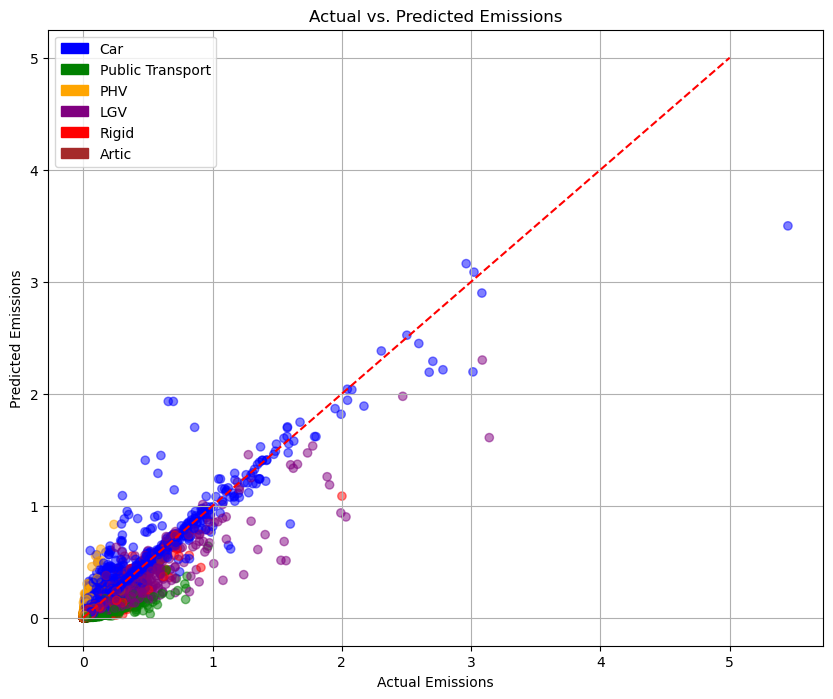

In [889]:
# Vehicle color mapping
import matplotlib.patches as mpatches

vehicle_colors = {
    'Car': 'blue',
    'Public Transport': 'green',
    'PHV': 'orange',
    'LGV': 'purple',
    'Rigid': 'red',
    'Artic': 'brown'
}

# Subset the vehicle types to match the test set
vehicle_test_subset = main_df.loc[y_test.index, 'VehicleType']  # Subset of VehicleType for the test data
colors = vehicle_test_subset.map(vehicle_colors)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, c=colors, alpha=0.5)

plt.xlabel('Actual Emissions')
plt.ylabel('Predicted Emissions')
plt.title('Actual vs. Predicted Emissions')

# Add perfect prediction line
plt.plot([0, 5], [0, 5], 'r--')

# Create legend

legend_patches = [mpatches.Patch(color=color, label=vehicle) for vehicle, color in vehicle_colors.items()]
plt.legend(handles=legend_patches)

plt.grid()
plt.show()


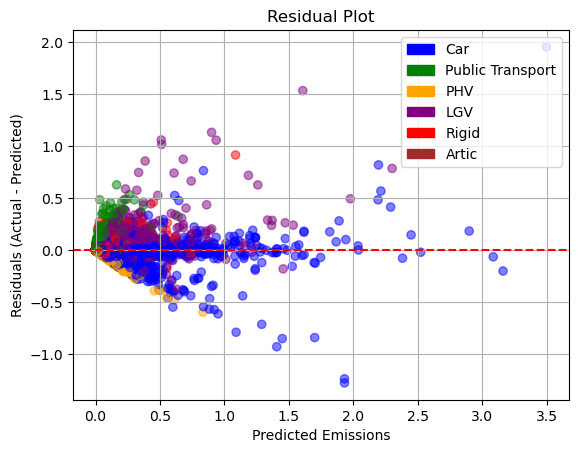

In [890]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, c=colors, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Zero error line
plt.xlabel('Predicted Emissions')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')

legend_patches = [mpatches.Patch(color=color, label=vehicle) for vehicle, color in vehicle_colors.items()]
plt.legend(handles=legend_patches)

plt.grid(True)
plt.show()

In [929]:
import pandas as pd
import numpy as np

# Assuming y_test and y_pred are defined
# Assuming main_df has the original data including VehicleType

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
})

# Add the VehicleType column from main_df, aligning by index
results_df['VehicleType'] = main_df.loc[y_test.index, 'VehicleType'].reset_index(drop=True)

# Calculate Absolute Error
results_df['Absolute Error'] = np.abs(results_df['Actual'] - results_df['Predicted'])

# Group by Vehicle Type and calculate mean Absolute Error
mean_errors = results_df.groupby('VehicleType')['Absolute Error'].mean().reset_index()

# Find the vehicle type with the least error
least_error_vehicle = mean_errors.loc[mean_errors['Absolute Error'].idxmin()]
highest_error_vehicle = mean_errors.loc[mean_errors['Absolute Error'].idxmax()]

print("Vehicle with least error:")
print(least_error_vehicle)

print("\nVehicle with highest error:")
print(highest_error_vehicle)

Vehicle with least error:
VehicleType          Artic
Absolute Error    0.015033
Name: 0, dtype: object

Vehicle with highest error:
VehicleType       Public Transport
Absolute Error            0.017328
Name: 4, dtype: object
